In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from matplotlib import pyplot
import scipy.stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
%matplotlib inline

In [2]:
fpath = 'facebook_data_businessinsider_comments_sentiment_4dict.tsv'
post_data = pd.read_csv(fpath, sep='\t')
post_data.head()

,ID,PostID,PostDate,CommentID,CommentDate,CommenterURL,CommentText,WNPositive,WNNegative,WNNeutral,...,HVTokenQnt,HVSentiAvg,LMPositive,LMNegative,LMTokenQnt,LMSentiAvg,Vader_Positive,Vader_Negative,Vader_Neutral,Vader_Compound
0,1,1.015863e+16,2021-04-05 19:59:00,10158633048804071,2021-04-21 03:25:07.571562,arron.swarts.1?fref=nf&rc=p&refid=52&__tn__=R,Think you lean towards empty water turning.......,0.125,0.250,3.625,...,3,-0.666667,0,0,3,0.000000,0.000,0.205,0.795,-0.2023
1,2,1.015863e+16,2021-04-05 19:59:00,10158633047079071,2021-04-21 03:25:08.313604,arron.swarts.1?fref=nf&rc=p&refid=52&__tn__=R,They try too fine sailers and get money for th...,0.375,0.000,2.625,...,5,-0.600000,0,1,5,-0.200000,0.113,0.195,0.692,-0.3182
2,3,1.015863e+16,2021-04-05 19:59:00,10158648483794071,2021-04-21 03:25:09.018738,liziqian314?fref=nf&rc=p&refid=52&__tn__=R,"A few days ago, Bitcoin continued to rise to a...",0.500,1.250,8.250,...,11,0.272727,0,2,11,-0.181818,0.000,0.045,0.955,-0.1513
3,4,1.015863e+16,2021-04-05 19:59:00,10158637366634071,2021-04-21 03:25:09.751900,robert.vanriezen?fref=nf&rc=p&refid=52&__tn__=R,America looks like they got a real President r...,1.500,0.375,7.125,...,10,-0.100000,0,0,10,0.000000,0.208,0.098,0.694,0.5106
4,5,1.015863e+16,2021-04-05 19:59:00,10158680741234071,NaN,richard.altman.718?fref=nf&rc=p&refid=52&__tn...,Rick scott is out of his mind to give trump th...,0.125,0.000,4.875,...,8,0.500000,0,0,8,0.000000,0.200,0.000,0.800,0.5423


In [3]:
post_data['Vader_Average'] = post_data['Vader_Positive'] - post_data['Vader_Negative']

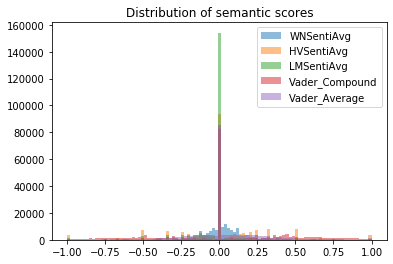

In [4]:
bins = np.linspace(-1, 1, 100)
pyplot.hist(post_data['WNSentiAvg'], bins, alpha=0.5, label='WNSentiAvg')
pyplot.hist(post_data['HVSentiAvg'], bins, alpha=0.5, label='HVSentiAvg')
pyplot.hist(post_data['LMSentiAvg'], bins, alpha=0.5, label='LMSentiAvg')
pyplot.hist(post_data['Vader_Compound'], bins, alpha=0.5, label='Vader_Compound')
pyplot.hist(post_data['Vader_Positive'] - post_data['Vader_Negative'], bins, alpha=0.5, label='Vader_Average')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of semantic scores')
pyplot.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

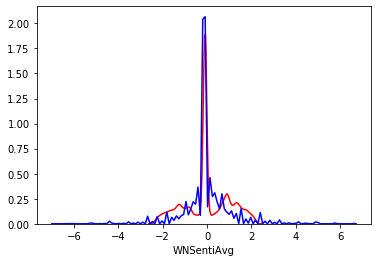

In [5]:


# seaborn histogram
sns.distplot((post_data['Vader_Compound'] - post_data['Vader_Compound'].mean())/post_data['Vader_Compound'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['WNSentiAvg'] - post_data['WNSentiAvg'].mean())/post_data['WNSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['LMSentiAvg'] - post_data['LMSentiAvg'].mean())/post_data['LMSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['HVSentiAvg'] - post_data['HVSentiAvg'].mean())/post_data['HVSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Vader_Average'] - post_data['Vader_Average'].mean())/post_data['Vader_Average'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'purple',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

In [7]:
post_data[['WNSentiAvg','HVSentiAvg','LMSentiAvg','Vader_Compound','Vader_Average']].describe()

,WNSentiAvg,HVSentiAvg,LMSentiAvg,Vader_Compound,Vader_Average
count,217336.000000,217336.000000,217336.000000,217336.000000,217336.000000
mean,0.020907,0.017494,-0.025111,0.041463,0.027415
std,0.147771,0.291409,0.143796,0.435650,0.251501
min,-1.000000,-1.000000,-1.000000,-0.999700,-1.000000
25%,-0.005000,0.000000,0.000000,-0.147475,-0.032000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.062500,0.142857,0.000000,0.361200,0.124000
max,1.000000,1.000000,1.000000,0.999800,1.000000


In [8]:
post_data['PostDate'] = pd.to_datetime(post_data['PostDate'], errors='coerce')

post_data['DateMonth'] = post_data['PostDate'].dt.strftime('%Y-%m')
post_data['DateDay'] = post_data['PostDate'].dt.strftime('%Y-%m-%d')

In [9]:
post_data['DateMonth'].head()

0    2021-04
1    2021-04
2    2021-04
3    2021-04
4    2021-04
Name: DateMonth, dtype: object

In [10]:
post_data.columns

Index(['ID', 'PostID', 'PostDate', 'CommentID', 'CommentDate', 'CommenterURL',
       'CommentText', 'WNPositive', 'WNNegative', 'WNNeutral', 'WNSentiment',
       'WNTokenQnt', 'WNSentiAvg', 'HVPositive', 'HVNegative', 'HVTokenQnt',
       'HVSentiAvg', 'LMPositive', 'LMNegative', 'LMTokenQnt', 'LMSentiAvg',
       'Vader_Positive', 'Vader_Negative', 'Vader_Neutral', 'Vader_Compound',
       'Vader_Average', 'DateMonth', 'DateDay'],
      dtype='object')

In [11]:
Monthly_Data = post_data.groupby('DateMonth').agg({'WNSentiAvg': 'sum'
                                                         ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                       })

In [12]:
DailyData = post_data.groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })

In [13]:
DailyData['WNSentiment'] =  DailyData['WNSentiAvg']/ DailyData['WNTokenQnt']
DailyData['HVSentiment'] = (DailyData['HVPositive'] - DailyData['HVNegative'])/DailyData['HVTokenQnt']
DailyData['LMSentiment'] = (DailyData['LMPositive'] - DailyData['LMNegative'])/DailyData['LMTokenQnt']

Monthly_Data['WNSentiment'] =  Monthly_Data['WNSentiAvg']/ Monthly_Data['WNTokenQnt']
Monthly_Data['HVSentiment'] = (Monthly_Data['HVPositive'] - Monthly_Data['HVNegative'])/Monthly_Data['HVTokenQnt']
Monthly_Data['LMSentiment'] = (Monthly_Data['LMPositive'] - Monthly_Data['LMNegative'])/Monthly_Data['LMTokenQnt']



In [14]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['WNSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -20.5197
p-value                          0.0000
#Lags Used                       0.0000
Number of Observations Used    346.0000
Critical Value (1%)             -3.4494
Critical Value (5%)             -2.8699
Critical Value (10%)            -2.5712
dtype: float64


In [15]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['HVSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.3332
p-value                          0.1615
#Lags Used                      15.0000
Number of Observations Used    331.0000
Critical Value (1%)             -3.4503
Critical Value (5%)             -2.8703
Critical Value (10%)            -2.5714
dtype: float64


In [16]:
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['LMSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value


Test Statistic                  -2.3332
p-value                          0.1615
#Lags Used                      15.0000
Number of Observations Used    331.0000
Critical Value (1%)             -3.4503
Critical Value (5%)             -2.8703
Critical Value (10%)            -2.5714
dtype: float64
Results of Dickey-Fuller Test:


In [17]:
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['Vader_Compound'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value


Test Statistic                  -3.9040
p-value                          0.0020
#Lags Used                       5.0000
Number of Observations Used    341.0000
Critical Value (1%)             -3.4497
Critical Value (5%)             -2.8701
Critical Value (10%)            -2.5713
dtype: float64
Results of Dickey-Fuller Test:


In [18]:
DailyData.head()

,WNSentiAvg,WNTokenQnt,Vader_Compound,Vader_Average,HVPositive,HVNegative,HVTokenQnt,LMPositive,LMNegative,LMTokenQnt,WNSentiment,HVSentiment,LMSentiment
DateDay,,,,,,,,,,,,,
2015-03-11,1.826509,58,0.043726,0.055655,54,41,334,3,9,334,0.031492,0.038922,-0.017964
2015-03-12,6.457657,501,0.050002,0.040884,364,261,2318,40,110,2318,0.012890,0.044435,-0.030198
2015-03-13,9.105466,451,0.094695,0.063612,444,357,2614,64,159,2614,0.020190,0.033282,-0.036343
2015-03-14,13.221716,461,0.116849,0.072701,392,225,2235,47,71,2235,0.028681,0.074720,-0.010738
2015-03-15,9.947850,210,0.164765,0.106057,119,84,811,12,17,811,0.047371,0.043157,-0.006165


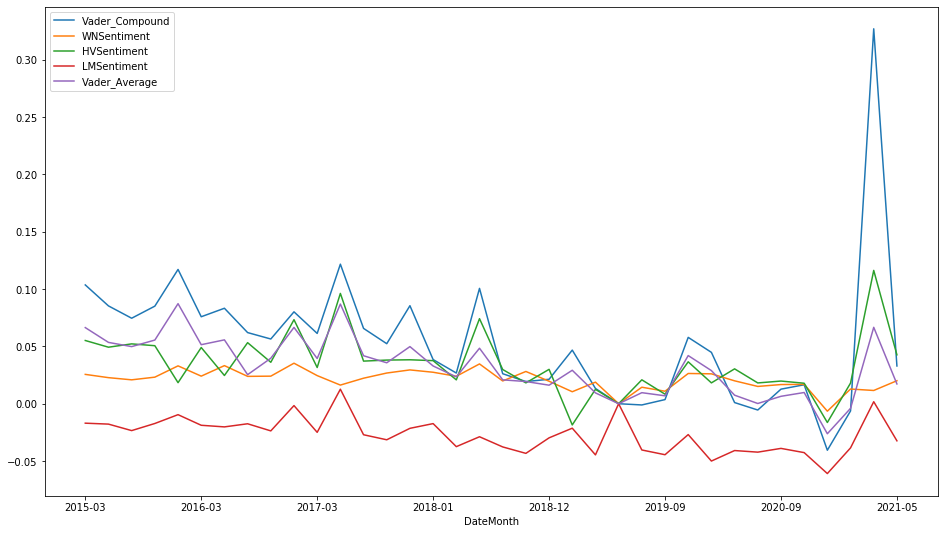

In [19]:
Monthly_Data[['Vader_Compound','WNSentiment','HVSentiment','LMSentiment','Vader_Average']].plot(legend=True, figsize=(16,9))

## Download S&P from Yahoo

In [20]:
SnP_daily = web.get_data_yahoo('^GSPC','10/01/2010','05/01/2021',interval='d')
SnP_monthly = web.get_data_yahoo('^GSPC','10/01/2010','05/01/2021',interval='m')

In [21]:
SnP_daily['LogReturn'] = np.log(SnP_daily['Adj Close']/SnP_daily['Adj Close'].shift(1))

In [22]:
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')

In [23]:
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))

## Granger test

In [24]:
Granger_data_daily = pd.merge(SnP_daily,DailyData, how= 'inner', left_index=True, right_index=True)

In [25]:
def grangerTest(exog, endog):
    MAX_LAG = 30
    ARaic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numExog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for exog data is " + str(numExog))

    ARaic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numEndog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for endog data is " + str(numEndog))

    # now that I know the optimal number of parameters, I can call the
    # granger causality function of statsmodels.
    data = pd.concat([endog, exog], axis=1)
    print ("\nGranger causality results of indep onto dep")
    results = grangercausalitytests(data, maxlag=numEndog)

    data = pd.concat([exog, endog], axis=1)
    print ("\nGranger causality results of dep onto indep")
    results = grangercausalitytests(data, maxlag=numExog)
    regr = results[2][1]
    print (regr[0].params)
    print (regr[1].params)
    print (regr[1].pvalues)

In [26]:
Granger_data_monthly = pd.merge(SnP_monthly,Monthly_Data, how= 'inner', left_index=True, right_index=True)

In [27]:
#Granger_data['SS_LogReturn'] = np.log((Granger_data['SentimentScoreAdj']+1)/(Granger_data['SentimentScoreAdj']+1).shift(1))

In [28]:
Granger_data_monthly

,High,Low,Open,Close,Volume,Adj Close,LogReturn,WNSentiAvg,WNTokenQnt,Vader_Compound,Vader_Average,HVPositive,HVNegative,HVTokenQnt,LMPositive,LMNegative,LMTokenQnt,WNSentiment,HVSentiment,LMSentiment
2015-03,2117.520020,2039.689941,2105.229980,2067.889893,76675850000,2067.889893,-0.017549,194.305937,7594,0.103619,0.066393,6959,4707,40841,1068,1761,40841,0.025587,0.055141,-0.016968
2015-06,2129.870117,2056.320068,2108.639893,2063.110107,73213980000,2063.110107,-0.021236,263.537542,11589,0.085323,0.053486,11810,8437,68422,1731,2948,68422,0.022740,0.049297,-0.017787
2015-09,2020.859985,1871.910034,1970.089966,1920.030029,79989370000,1920.030029,-0.026799,113.436575,5443,0.074570,0.049816,6418,4501,36730,883,1744,36730,0.020841,0.052192,-0.023441
2015-12,2104.270020,1993.260010,2082.929932,2043.939941,83649260000,2043.939941,-0.017686,227.274638,9809,0.085116,0.055525,10363,7290,60732,1570,2617,60732,0.023170,0.050599,-0.017240
2016-01,2038.199951,1812.290039,2038.199951,1940.239990,92409770000,1940.239990,-0.052068,11.194267,339,0.117126,0.087274,182,157,1362,38,51,1362,0.033021,0.018355,-0.009545
2016-03,2072.209961,1937.089966,1937.089966,2059.739990,92639420000,2059.739990,0.063905,235.281986,9780,0.075858,0.051487,9595,6839,56220,1364,2421,56220,0.024057,0.049022,-0.018801
2016-06,2120.550049,1991.680054,2093.939941,2098.860107,86852700000,2098.860107,0.000911,297.142732,8943,0.083269,0.055692,9463,7772,68679,1377,2765,68679,0.033226,0.024622,-0.020210
2016-09,2187.870117,2119.120117,2171.330078,2168.270020,77270240000,2168.270020,-0.001235,4.510116,189,0.062051,0.025333,249,182,1258,48,70,1258,0.023863,0.053259,-0.017488
2016-12,2277.530029,2187.439941,2200.169922,2238.830078,75251240000,2238.830078,0.018037,305.237261,12693,0.056448,0.039667,13019,10145,79508,1801,3685,79508,0.024048,0.036147,-0.023696
2017-01,2300.989990,2245.129883,2251.570068,2278.870117,70483180000,2278.870117,0.017726,11.132536,315,0.080145,0.066552,173,83,1228,31,33,1228,0.035341,0.073290,-0.001629


In [29]:
Vars = ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"]
for Var in Vars:
    print("\n" + Var + "\n")
    grangerTest(Granger_data_daily[Var], Granger_data_daily['LogReturn'])


Vader_Compound

Optimal number of lags for exog data is 3
Optimal number of lags for endog data is 3

C:\Users\Windows\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)




Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5233  , p=0.4702  , df_denom=226, df_num=1
ssr based chi2 test:   chi2=0.5303  , p=0.4665  , df=1
likelihood ratio test: chi2=0.5297  , p=0.4667  , df=1
parameter F test:         F=0.5233  , p=0.4702  , df_denom=226, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0845  , p=0.9190  , df_denom=223, df_num=2
ssr based chi2 test:   chi2=0.1729  , p=0.9172  , df=2
likelihood ratio test: chi2=0.1728  , p=0.9172  , df=2
parameter F test:         F=0.0845  , p=0.9190  , df_denom=223, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3209  , p=0.8103  , df_denom=220, df_num=3
ssr based chi2 test:   chi2=0.9932  , p=0.8029  , df=3
likelihood ratio test: chi2=0.9911  , p=0.8034  , df=3
parameter F test:         F=0.3209  , p=0.8103  , df_denom=220, df_num=3

Granger causality results of dep onto indep

Gr

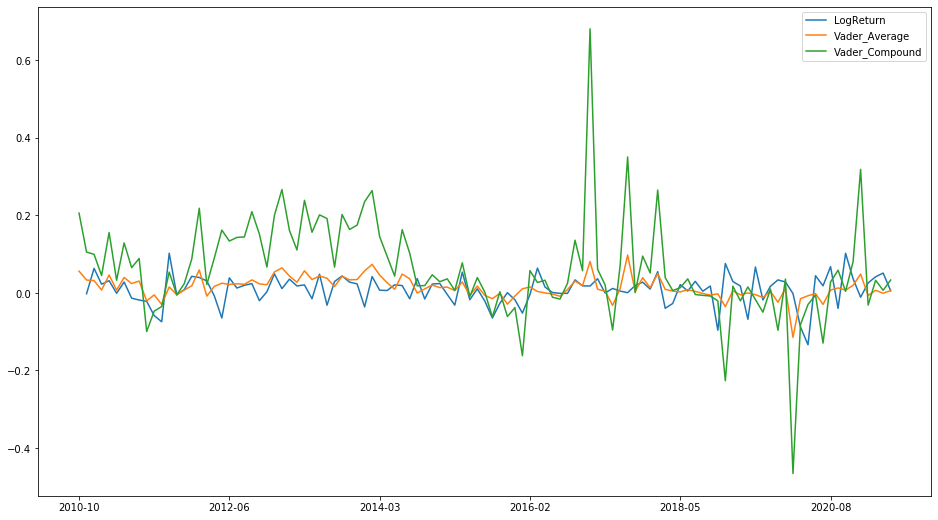

In [33]:
Granger_data_monthly[['LogReturn','Vader_Average','Vader_Compound']].plot(legend=True, figsize=(16,9))

In [31]:
corr = Granger_data_daily[["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment","LogReturn"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Vader_Compound,Vader_Average,WNSentiment,HVSentiment,LMSentiment,LogReturn
Vader_Compound,1.000000,0.784458,0.403164,0.510469,0.504660,-0.005682
Vader_Average,0.784458,1.000000,0.491661,0.445501,0.428153,0.003532
WNSentiment,0.403164,0.491661,1.000000,0.322722,0.283764,-0.000352
HVSentiment,0.510469,0.445501,0.322722,1.000000,0.549956,0.025830
LMSentiment,0.504660,0.428153,0.283764,0.549956,1.000000,0.006965
LogReturn,-0.005682,0.003532,-0.000352,0.025830,0.006965,1.000000


In [30]:
pvals = [] 
for col in ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"]:
    pvals.append(scipy.stats.linregress(Granger_data_daily['LogReturn'][1:], Granger_data_daily[col][1:].dropna())[3])
corr_signif = pd.DataFrame(pvals,columns = ['p-value']
                           ,index = ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"])
corr_signif

,p-value
Vader_Compound,0.308995
Vader_Average,0.593191
WNSentiment,0.571429
HVSentiment,0.908086
LMSentiment,0.612634


In [38]:
pvals_mnt = [] 
for col in ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']:
    pvals_mnt.append(scipy.stats.linregress(Granger_data_monthly['LogReturn'][1:], Granger_data_monthly[col][1:].dropna())[3])
corr_signif_mnt = pd.DataFrame(pvals_mnt,columns = ['p-value']
                           ,index = ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average'])
corr_signif_mnt

,p-value
Vader_Compound,0.084306
Flair_Score,0.977764
SentimentScoreAdj,0.311650
Vader_Average,0.047369
